<a href="https://colab.research.google.com/github/akipi-ro/daily_study/blob/master/script9_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#rstanがインストールされていないならインストールする
x<-installed.packages()
if(any(x[,1]== 'rstan') == FALSE){
    system("add-apt-repository -y ppa:marutter/rrutter3.5")
    system("add-apt-repository -y ppa:marutter/c2d4u3.5") 
    system("apt-get update")
    system("apt install -y r-cran-rstan")
}

#

1.   表3.2に登場する標本平均、標本標準偏差、標本分散、標本四 分位点、
2群の異同

*   ガソリン車

> 平均：2518

> 標準偏差：501.00024920775

> 標本分散：249644

*   ディーゼル車

> 平均：2899

> 標準偏差：585

> 標本分散：325543









Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.3, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1488    2128    2405    2518    2847    4066 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2017    2308    2948    2899    3444    3770 

[1] 2518.459

[1] 2898.8

[1] 501.0002

[1] 585.386

[1] 251001.2

[1] 342676.8

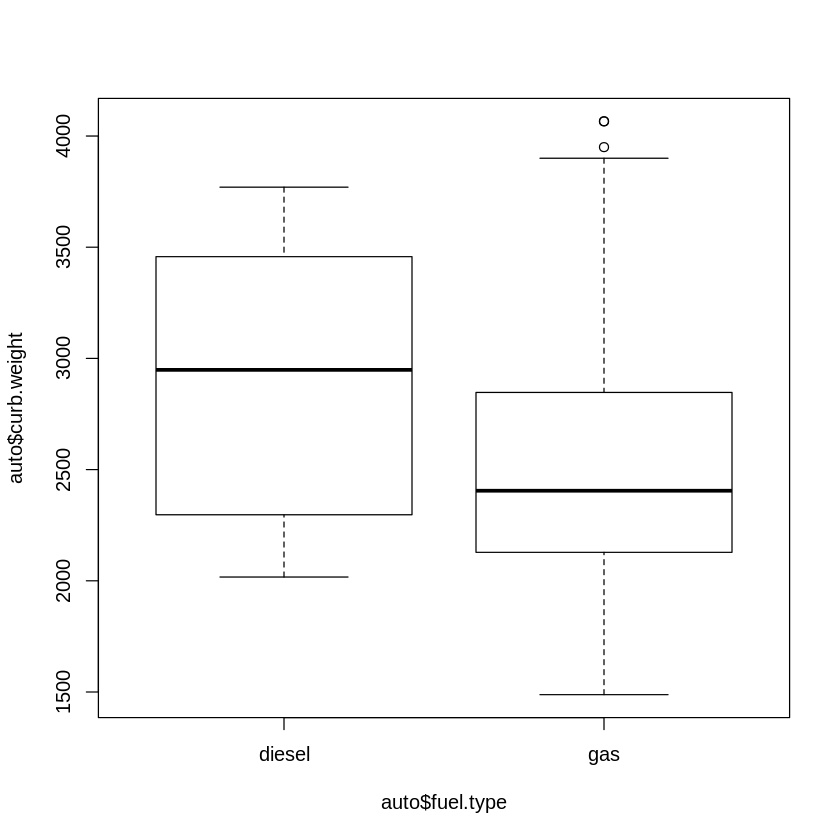

In [ ]:
library(rstan)
# Automobile Datasetより
auto <- read.csv("Automobile.csv") # データフレームが得られる 
weight.gas <- auto[auto$fuel.type=="gas",]$curb.weight # ガソリン車の行から車両重量を取り出す
weight.diesel <- auto[auto$fuel.type=="diesel",]$curb.weight # ディーゼル車の行から車両重量を取り出す
# 箱ひげ図を描く


summary(weight.gas)
summary(weight.diesel)


mean(weight.gas)
mean(weight.diesel)
sd(weight.gas)#標準偏差
sd(weight.diesel)
var(weight.gas)#分散
var(weight.diesel)

boxplot(auto$curb.weight ~ auto$fuel.type)





In [ ]:
max(weight.diesel)
max(weight.gas)

[1] 3770

[1] 4066

#stanコード

In [ ]:
stancode2 <-'data {
  int n1; // 第1群のデータ数
  int n2; // 第2群のデータ数
  real x1[n1]; // 第1群のデータ
  real x2[n2]; // 第2群のデータ
}

parameters {
  real mu1; // 第1群の平均μ1
  real mu2; // 第2群の平均μ2
  real<lower=0> sigma; // 第1群、第2群の標準偏差σ
}

model {
  mu1 ~ uniform(0,5000);
  mu2 ~ uniform(0,5000);
  sigma ~ uniform(0,4000);

  x1 ~ normal(mu1,sigma);
  x2 ~ normal(mu2,sigma);
}

generated quantities {
  real mu1_minus_mu2;
  real u_mu1_gt_mu2;
  real u_mu1_minus_mu2_gt_5;
  real delta;
  real u_delta_gt_03;
  real U3;#
  real u_U3_gt_06;
  real pi_d;
  real u_pi_d_gt_08;

  mu1_minus_mu2 = mu1 - mu2; // μ1-μ2 式(3.11)
  u_mu1_gt_mu2 = mu1 - mu2 > 0; // u_{μ1>μ2} 式(3.12)
  u_mu1_minus_mu2_gt_5 = mu1 - mu2 > 500; // u_{μ1-μ2>c} 式(3.13)
  delta = (mu1 - mu2) / sigma; // δ 式(3.15)
  u_delta_gt_03 = delta > 0.3; // u_{δ>c} 式(3.16)
  U3 = normal_cdf(mu1, mu2, sigma); // U3 式(3.17)
  u_U3_gt_06 = U3 > 0.6; // u_{U3>c} 式(3.21)
  pi_d = normal_cdf(delta / sqrt(2), 0, 1); // πd 式(3.24)
  u_pi_d_gt_08 = pi_d > 0.8; // u_{πd>c} 式(3.26)
}
'

In [ ]:
fit <- stan(model_code = stancode2,
            data=list(n1=length(weight.diesel),
                      n2=length(weight.gas),
                      x1=weight.diesel,
                      x2=weight.gas),
            iter=21000,warmup=1000,chains=5)

DIAGNOSTIC(S) FROM PARSER:
Info: Comments beginning with # are deprecated.  Please use // in place of # for line comments.


SAMPLING FOR MODEL '6d63657e83aa186f745dfb1ace57574d' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 9e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:     1 / 21000 [  0%]  (Warmup)
Chain 1: Iteration:  1001 / 21000 [  4%]  (Sampling)
Chain 1: Iteration:  3100 / 21000 [ 14%]  (Sampling)
Chain 1: Iteration:  5200 / 21000 [ 24%]  (Sampling)
Chain 1: Iteration:  7300 / 21000 [ 34%]  (Sampling)
Chain 1: Iteration:  9400 / 21000 [ 44%]  (Sampling)
Chain 1: Iteration: 11500 / 21000 [ 54%]  (Sampling)
Chain 1: Iteration: 13600 / 21000 [ 64%]  (Sampling)
Chain 1: Iteration: 15700 / 21000 [ 74%]  (Sampling)
Chain 1: Iteration: 17800 / 21000 [ 84%]  (Sampling)
Chain 1: Iteration: 19900 / 21000 [ 94%]  (Sampling)
Chain 1: I

Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”




ディーゼル車μ１に対するガソリン車μ２の分析
---


# *   母平均の差と95％信頼区間(mu1_minus_mu2)
> ２母平均の差（EAP）は380であり、95％の確信で[143,618]143ポンド以上619ポンド未満
# *   ３母平均の差は少なくともどれくらいか、多くともどれくらいか(mu1_minus_mu2)..5%点と９５％点を求める

> ディーゼルとガソリンに対する重さの平均の差は少なくとも181ポンドで、多くとも579ポンドになる



# *   ４ディーゼルとガソリンの平均の差が500ポンド違う確率は？(u_mu_1_mins_mu2_gt_5)



 > 0.16より１６％である


# *   ５効果量（delta）のEAP,95％信頼区間

> 効果量のEAPは０.744、95%の信頼区間で[0.275,1.212]


# *   ６効果量が０.３以上（偏差値３）である確率は？（u_delta_gt_0.3）

> 0.97で97%になる


# *   ７非重複度　ディーゼルの平均がガソリンの平均のなん％点にあるか、信頼区間は？(U3)

> 0.77より77％ぐらいにあって、信頼区間は[0.61,0.89]

# *   8非重複度　ディーゼルの平均がガソリンの平均の60%点より大きい確率はどのくらいか(u_U3gt_06)

> 98%である


# *   ９優越率（無作為に選んだ方の群が、無作為に選んだもう一方の群の測定値を上回る確率）のEAP,95％信頼区間（pi_d）

> 優越率のEAPは70％、95％信頼区間は[0.58,0.80]


# *   10　優越率が80％超える確率はどれくらい？(u_pi_d_08)

> 0.03より3％










Inference for Stan model: 6d63657e83aa186f745dfb1ace57574d.
5 chains, each with iter=21000; warmup=1000; thin=1; 
post-warmup draws per chain=20000, total post-warmup draws=1e+05.

                         mean se_mean     sd     2.5%       5%      95%
mu1                   2898.74    0.36 115.22  2671.11  2708.49  3087.12
mu2                   2518.48    0.12  37.64  2444.98  2456.97  2580.56
sigma                  512.68    0.08  25.68   465.53   472.25   556.60
mu1_minus_mu2          380.26    0.38 121.09   141.03   180.44   578.48
u_mu1_gt_mu2             1.00    0.00   0.03     1.00     1.00     1.00
u_mu1_minus_mu2_gt_5     0.16    0.00   0.37     0.00     0.00     1.00
delta                    0.74    0.00   0.24     0.27     0.35     1.13
u_delta_gt_03            0.97    0.00   0.18     0.00     1.00     1.00
U3                       0.77    0.00   0.07     0.61     0.64     0.87
u_U3_gt_06               0.98    0.00   0.14     1.00     1.00     1.00
pi_d                     0.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



Inference for Stan model: 6d63657e83aa186f745dfb1ace57574d.
5 chains, each with iter=21000; warmup=1000; thin=1; 
post-warmup draws per chain=20000, total post-warmup draws=1e+05.

                          mean se_mean      sd      2.5%        5%       95%
mu1                   2898.737   0.359 115.215  2671.107  2708.488  3087.119
mu2                   2518.475   0.119  37.640  2444.979  2456.974  2580.556
sigma                  512.677   0.083  25.680   465.526   472.247   556.598
mu1_minus_mu2          380.262   0.379 121.091   141.032   180.439   578.476
u_mu1_gt_mu2             0.999   0.000   0.033     1.000     1.000     1.000
u_mu1_minus_mu2_gt_5     0.161   0.001   0.367     0.000     0.000     1.000
delta                    0.744   0.001   0.239     0.273     0.349     1.134
u_delta_gt_03            0.968   0.001   0.177     0.000     1.000     1.000
U3                       0.765   0.000   0.072     0.608     0.637     0.872
u_U3_gt_06               0.980   0.001   0.141   

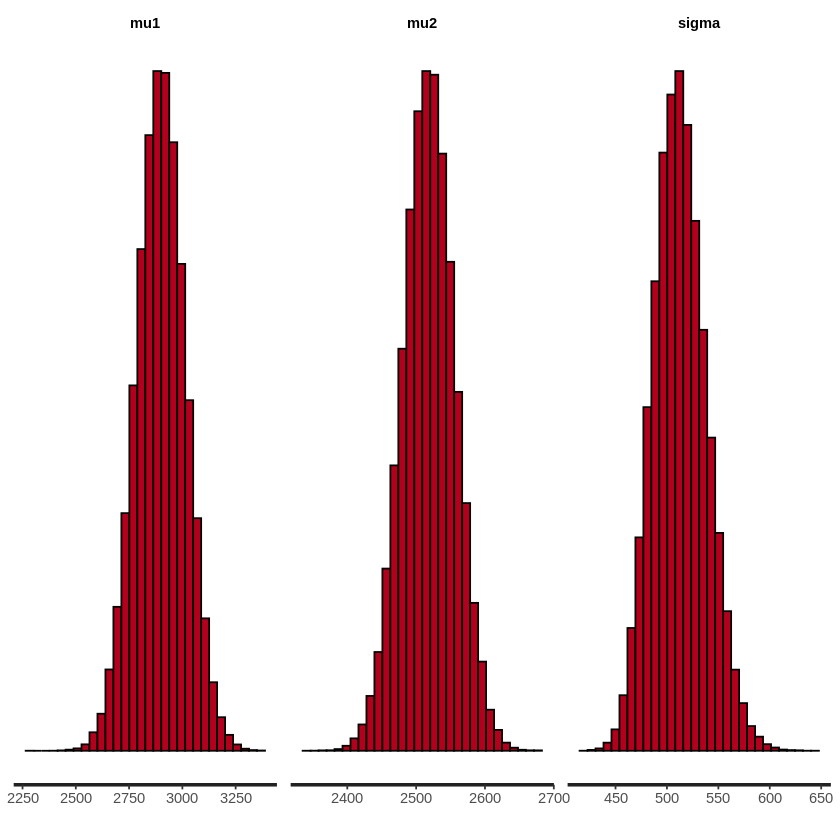

In [ ]:
print(fit,probs=c(0.025,0.05,0.95,0.975))
stan_hist(fit,pars=c("mu1","mu2","sigma"))
print(fit,probs=c(0.025,0.05,0.95,0.975),digits=3)

In [ ]:

fit <- stan("2groups-indep.stan",
            data=list(n1=length(weight.diesel),
                      n2=length(weight.gas),
                      x1=weight.diesel,
                      x2=weight.gas),
            iter=21000,warmup=1000,chains=5)
print(fit,probs=c(0.025,0.05,0.95,0.975))
stan_hist(fit,pars=c("mu1","mu2","sigma"))
print(fit,probs=c(0.025,0.05,0.95,0.975),digits=3)

Warning message in normalizePath(file):
“path[1]="2groups-indep.stan": No such file or directory”
Warning message in file(fname, "rt"):
“cannot open file '2groups-indep.stan': No such file or directory”


Error in file(fname, "rt") : cannot open the connection


ERROR: ignored